<a href="https://colab.research.google.com/github/haujla2391/CSCI-4170/blob/main/02_training_clinic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment Log

## Requirements:

Minimum reproducibility expectations:
• Fix random seeds and record them.
• Keep the train/test split fixed across baseline and SVM comparisons.
• Record model type, key hyperparameters, and metrics for each run.

# Part B

## Task 1

In [ ]:
import os
import torch
import numpy as np
import pandas as pd
import kagglehub
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [ ]:
# Download latest version
path = kagglehub.dataset_download("drsaeedmohsen/ucihar-dataset")
path = '/kaggle/input/ucihar-dataset/UCI-HAR Dataset'

print("Path to dataset files:", path)

subject_train_file = os.path.join(path, 'train', 'subject_train.txt')
subjects_train = np.loadtxt(subject_train_file, dtype=int)

subjects_test_file = os.path.join(path, 'test', 'subject_test.txt')
subjects_test = np.loadtxt(subjects_test_file, dtype=int)

# Load raw sensor data
body_acc_x = np.loadtxt(f'{path}/train/Inertial Signals/body_acc_x_train.txt')
body_acc_y = np.loadtxt(f'{path}/train/Inertial Signals/body_acc_y_train.txt')
body_acc_z = np.loadtxt(f'{path}/train/Inertial Signals/body_acc_z_train.txt')
body_gyro_x = np.loadtxt(f'{path}/train/Inertial Signals/body_gyro_x_train.txt')
body_gyro_y = np.loadtxt(f'{path}/train/Inertial Signals/body_gyro_y_train.txt')
body_gyro_z = np.loadtxt(f'{path}/train/Inertial Signals/body_gyro_z_train.txt')

# Stack features along the third dimension
X_train = np.stack([body_acc_x, body_acc_y, body_acc_z, body_gyro_x, body_gyro_y, body_gyro_z], axis=2)

print("Training data shape:", X_train.shape)

y_train = np.loadtxt(f'{path}/train/y_train.txt')
y_train = y_train - 1
y_train = y_train.astype(int)

print("Training labels shape:", y_train.shape)

# Test data
body_acc_x = np.loadtxt(f'{path}/test/Inertial Signals/body_acc_x_test.txt')
body_acc_y = np.loadtxt(f'{path}/test/Inertial Signals/body_acc_y_test.txt')
body_acc_z = np.loadtxt(f'{path}/test/Inertial Signals/body_acc_z_test.txt')
body_gyro_x = np.loadtxt(f'{path}/test/Inertial Signals/body_gyro_x_test.txt')
body_gyro_y = np.loadtxt(f'{path}/test/Inertial Signals/body_gyro_y_test.txt')
body_gyro_z = np.loadtxt(f'{path}/test/Inertial Signals/body_gyro_z_test.txt')

# Stack features along the third dimension
X_test = np.stack([body_acc_x, body_acc_y, body_acc_z, body_gyro_x, body_gyro_y, body_gyro_z], axis=2)

print("Testing data shape:", X_test.shape)

y_test = np.loadtxt(f'{path}/test/y_test.txt')
y_test = y_test - 1
y_test = y_test.astype(int)

print("Training labels shape:", y_test.shape)

Using Colab cache for faster access to the 'ucihar-dataset' dataset.
Path to dataset files: /kaggle/input/ucihar-dataset/UCI-HAR Dataset
Training data shape: (7352, 128, 6)
Training labels shape: (7352,)
Testing data shape: (2947, 128, 6)
Training labels shape: (2947,)


In [ ]:
assert len(subjects_train) == len(X_train)

unique_subjects = np.unique(subjects_train)

train_subjects, val_subjects = train_test_split(
    unique_subjects,
    test_size=0.2,
    random_state=45
)


train_mask = np.isin(subjects_train, train_subjects)
val_mask  = np.isin(subjects_train, val_subjects)



X_val  = X_train[val_mask]
X_train = X_train[train_mask]


y_val = y_train[val_mask]
y_train = y_train[train_mask]

subjects_train_split = subjects_train[train_mask]
subjects_val_split  = subjects_train[val_mask]


overlap = np.intersect1d(subjects_train_split, subjects_val_split)
print("Subject overlap:", len(overlap))

Subject overlap: 0


##Part 8

Epoch 1/50 | Train Loss: 1.7332 | Val Loss: 1.5509 | Train F1: 0.1554 | Val F1: 0.1631
Epoch 2/50 | Train Loss: 1.4107 | Val Loss: 1.2618 | Train F1: 0.4437 | Val F1: 0.4198
Epoch 3/50 | Train Loss: 1.0587 | Val Loss: 0.8917 | Train F1: 0.5662 | Val F1: 0.5367
Epoch 4/50 | Train Loss: 0.7631 | Val Loss: 0.7622 | Train F1: 0.5451 | Val F1: 0.5339
Epoch 5/50 | Train Loss: 0.6704 | Val Loss: 0.7124 | Train F1: 0.6155 | Val F1: 0.5768
Epoch 6/50 | Train Loss: 0.6260 | Val Loss: 0.6964 | Train F1: 0.6318 | Val F1: 0.5883
Epoch 7/50 | Train Loss: 0.6015 | Val Loss: 0.6746 | Train F1: 0.6482 | Val F1: 0.6064
Epoch 8/50 | Train Loss: 0.5879 | Val Loss: 0.6565 | Train F1: 0.6695 | Val F1: 0.6417
Epoch 9/50 | Train Loss: 0.5775 | Val Loss: 0.6385 | Train F1: 0.7074 | Val F1: 0.6854
Epoch 10/50 | Train Loss: 0.5649 | Val Loss: 0.6249 | Train F1: 0.6996 | Val F1: 0.6705
Epoch 11/50 | Train Loss: 0.5488 | Val Loss: 0.6384 | Train F1: 0.7166 | Val F1: 0.6890
Epoch 12/50 | Train Loss: 0.5318 | Val Lo

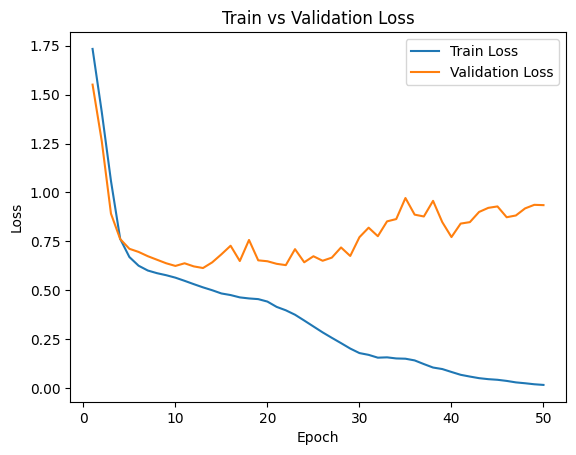

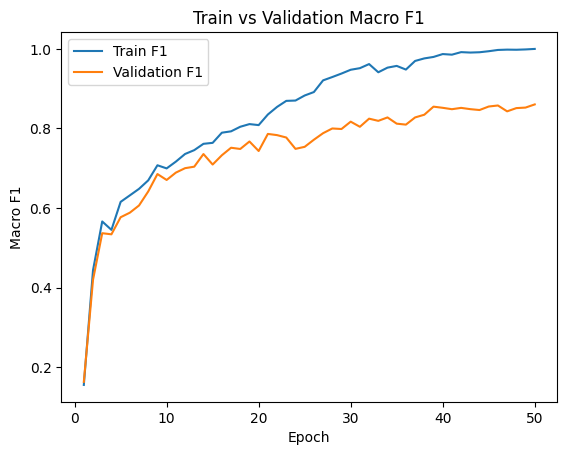

In [ ]:
import matplotlib.pyplot as plt

train_losses = []
val_losses = []
train_f1s = []
val_f1s = []

def flatten_windows(X):
    return X.reshape(X.shape[0], -1)

X_train_f = flatten_windows(X_train)
X_val_f   = flatten_windows(X_val)
X_test_f  = flatten_windows(X_test)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_t = torch.tensor(X_train_f, dtype=torch.float32)
Y_train_t = torch.tensor(y_train, dtype=torch.long)

X_val_t = torch.tensor(X_val_f, dtype=torch.float32)
Y_val_t = torch.tensor(y_val, dtype=torch.long)

X_test_t = torch.tensor(X_test_f, dtype=torch.float32)
Y_test_t = torch.tensor(y_test, dtype=torch.long)

batch_size = 640

train_loader = DataLoader(TensorDataset(X_train_t, Y_train_t), batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_t, Y_val_t), batch_size=batch_size)
test_loader  = DataLoader(TensorDataset(X_test_t, Y_test_t), batch_size=batch_size)


torch.manual_seed(42)

class MLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(),

            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 256),
            nn.LeakyReLU(),
            #nn.BatchNorm1d(128),
            #nn.Dropout(0.3),

            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.model(x)

input_dim = X_train_f.shape[1]
num_classes = len(np.unique(y_train))

model = MLP(input_dim, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

def evaluate(loader):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(y.cpu().numpy())

    return np.array(all_targets), np.array(all_preds)

epochs = 50
best_val_f1 = 0

for epoch in range(epochs):
    model.train()
    running_train_loss = 0.0

    # Train
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * x.size(0)

    # Get losses
    epoch_train_loss = running_train_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            loss = criterion(outputs, y)
            running_val_loss += loss.item() * x.size(0)

    epoch_val_loss = running_val_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)

    # Get the vals
    y_train_true, y_train_pred = evaluate(train_loader)
    train_macro_f1 = f1_score(y_train_true, y_train_pred, average='macro')
    train_f1s.append(train_macro_f1)

    y_val_true, y_val_pred = evaluate(val_loader)
    val_macro_f1 = f1_score(y_val_true, y_val_pred, average='macro')
    val_f1s.append(val_macro_f1)

    # Save best model
    if val_macro_f1 > best_val_f1:
        best_val_f1 = val_macro_f1
        torch.save(model.state_dict(), "best_mlp.pt")

    print(
        f"Epoch {epoch+1}/{epochs} | "
        f"Train Loss: {epoch_train_loss:.4f} | "
        f"Val Loss: {epoch_val_loss:.4f} | "
        f"Train F1: {train_macro_f1:.4f} | "
        f"Val F1: {val_macro_f1:.4f}"
    )


    epochs_range = range(1, epochs + 1)

# Plot vals and losses
plt.figure()
plt.plot(epochs_range, train_losses)
plt.plot(epochs_range, val_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.show()

plt.figure()
plt.plot(epochs_range, train_f1s)
plt.plot(epochs_range, val_f1s)
plt.xlabel("Epoch")
plt.ylabel("Macro F1")
plt.title("Train vs Validation Macro F1")
plt.legend(["Train F1", "Validation F1"])
plt.show()

Epoch 1/50 | Train Loss: 1.7381 | Val Loss: 1.5686 | Train F1: 0.1550 | Val F1: 0.1469
Epoch 2/50 | Train Loss: 1.4633 | Val Loss: 1.3218 | Train F1: 0.2848 | Val F1: 0.2655
Epoch 3/50 | Train Loss: 1.2563 | Val Loss: 1.0878 | Train F1: 0.4599 | Val F1: 0.4301
Epoch 4/50 | Train Loss: 1.0033 | Val Loss: 0.8305 | Train F1: 0.5304 | Val F1: 0.5125
Epoch 5/50 | Train Loss: 0.8386 | Val Loss: 0.7288 | Train F1: 0.5555 | Val F1: 0.5372
Epoch 6/50 | Train Loss: 0.7356 | Val Loss: 0.7002 | Train F1: 0.6032 | Val F1: 0.5728
Epoch 7/50 | Train Loss: 0.6972 | Val Loss: 0.6822 | Train F1: 0.5764 | Val F1: 0.5576
Epoch 8/50 | Train Loss: 0.6681 | Val Loss: 0.6614 | Train F1: 0.6232 | Val F1: 0.5944
Epoch 9/50 | Train Loss: 0.6586 | Val Loss: 0.6572 | Train F1: 0.6497 | Val F1: 0.6176
Epoch 10/50 | Train Loss: 0.6462 | Val Loss: 0.6534 | Train F1: 0.6408 | Val F1: 0.6003
Epoch 11/50 | Train Loss: 0.6365 | Val Loss: 0.6535 | Train F1: 0.6426 | Val F1: 0.6013
Epoch 12/50 | Train Loss: 0.6317 | Val Lo

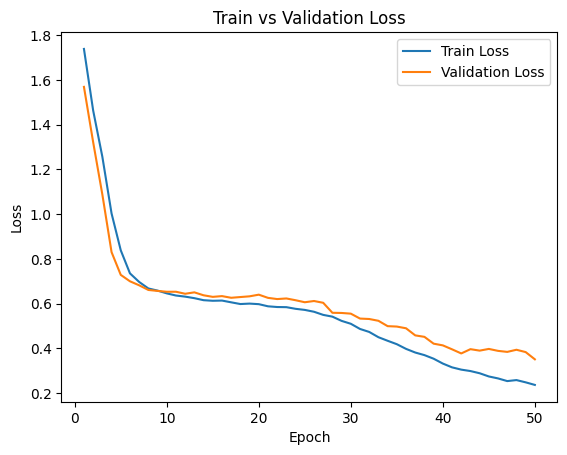

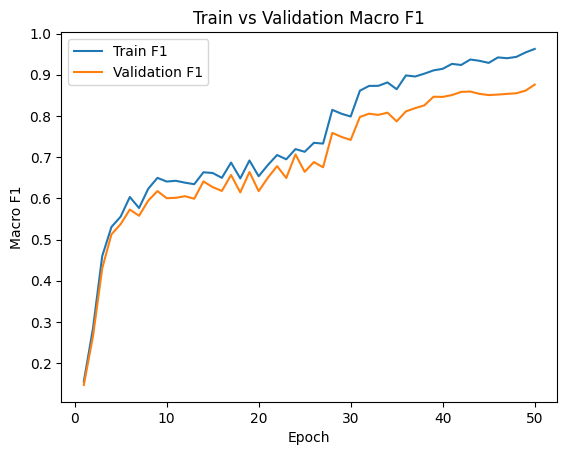

In [ ]:
import matplotlib.pyplot as plt

train_losses = []
val_losses = []
train_f1s = []
val_f1s = []

def flatten_windows(X):
    return X.reshape(X.shape[0], -1)

X_train_f = flatten_windows(X_train)
X_val_f   = flatten_windows(X_val)
X_test_f  = flatten_windows(X_test)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_t = torch.tensor(X_train_f, dtype=torch.float32)
Y_train_t = torch.tensor(y_train, dtype=torch.long)

X_val_t = torch.tensor(X_val_f, dtype=torch.float32)
Y_val_t = torch.tensor(y_val, dtype=torch.long)

X_test_t = torch.tensor(X_test_f, dtype=torch.float32)
Y_test_t = torch.tensor(y_test, dtype=torch.long)

batch_size = 640

train_loader = DataLoader(TensorDataset(X_train_t, Y_train_t), batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_t, Y_val_t), batch_size=batch_size)
test_loader  = DataLoader(TensorDataset(X_test_t, Y_test_t), batch_size=batch_size)
torch.manual_seed(123)

class MLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.4),

            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.4),

            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.model(x)

    def forward(self, x):
        return self.model(x)

input_dim = X_train_f.shape[1]
num_classes = len(np.unique(y_train))

model = MLP(input_dim, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(
    model.parameters(),
    lr=1e-3,
    weight_decay=1e-2
)

def evaluate(loader):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(y.cpu().numpy())

    return np.array(all_targets), np.array(all_preds)

epochs = 50
best_val_f1 = 0

for epoch in range(epochs):
    model.train()
    running_train_loss = 0.0

    # Train
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * x.size(0)

    # Get losses
    epoch_train_loss = running_train_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            loss = criterion(outputs, y)
            running_val_loss += loss.item() * x.size(0)

    epoch_val_loss = running_val_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)

    # Get the vals
    y_train_true, y_train_pred = evaluate(train_loader)
    train_macro_f1 = f1_score(y_train_true, y_train_pred, average='macro')
    train_f1s.append(train_macro_f1)

    y_val_true, y_val_pred = evaluate(val_loader)
    val_macro_f1 = f1_score(y_val_true, y_val_pred, average='macro')
    val_f1s.append(val_macro_f1)

    # Save best model
    if val_macro_f1 > best_val_f1:
        best_val_f1 = val_macro_f1
        torch.save(model.state_dict(), "best_mlp.pt")

    print(
        f"Epoch {epoch+1}/{epochs} | "
        f"Train Loss: {epoch_train_loss:.4f} | "
        f"Val Loss: {epoch_val_loss:.4f} | "
        f"Train F1: {train_macro_f1:.4f} | "
        f"Val F1: {val_macro_f1:.4f}"
    )


    epochs_range = range(1, epochs + 1)

# Plot vals and losses
plt.figure()
plt.plot(epochs_range, train_losses)
plt.plot(epochs_range, val_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.show()

plt.figure()
plt.plot(epochs_range, train_f1s)
plt.plot(epochs_range, val_f1s)
plt.xlabel("Epoch")
plt.ylabel("Macro F1")
plt.title("Train vs Validation Macro F1")
plt.legend(["Train F1", "Validation F1"])
plt.show()

Epoch 1/50 | Train Loss: 14222818432.4343 | Val Loss: 1683190221886202.0000 | Train F1: 0.0478 | Val F1: 0.0457
Epoch 2/50 | Train Loss: 9316910176605452875333632.0000 | Val Loss: 5720178872265253828786388992.0000 | Train F1: 0.0534 | Val F1: 0.0541
Epoch 3/50 | Train Loss: nan | Val Loss: nan | Train F1: 0.0482 | Val F1: 0.0459
Epoch 4/50 | Train Loss: nan | Val Loss: nan | Train F1: 0.0482 | Val F1: 0.0459
Epoch 5/50 | Train Loss: nan | Val Loss: nan | Train F1: 0.0482 | Val F1: 0.0459
Epoch 6/50 | Train Loss: nan | Val Loss: nan | Train F1: 0.0482 | Val F1: 0.0459
Epoch 7/50 | Train Loss: nan | Val Loss: nan | Train F1: 0.0482 | Val F1: 0.0459
Epoch 8/50 | Train Loss: nan | Val Loss: nan | Train F1: 0.0482 | Val F1: 0.0459
Epoch 9/50 | Train Loss: nan | Val Loss: nan | Train F1: 0.0482 | Val F1: 0.0459
Epoch 10/50 | Train Loss: nan | Val Loss: nan | Train F1: 0.0482 | Val F1: 0.0459
Epoch 11/50 | Train Loss: nan | Val Loss: nan | Train F1: 0.0482 | Val F1: 0.0459
Epoch 12/50 | Train

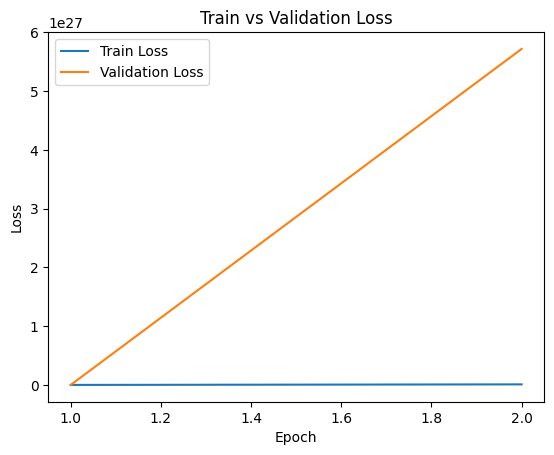

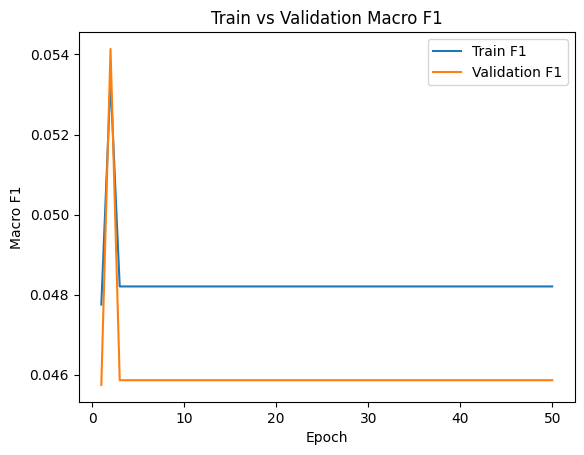

In [ ]:
import matplotlib.pyplot as plt

train_losses = []
val_losses = []
train_f1s = []
val_f1s = []

def flatten_windows(X):
    return X.reshape(X.shape[0], -1)

X_train_f = flatten_windows(X_train)
X_val_f   = flatten_windows(X_val)
X_test_f  = flatten_windows(X_test)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_t = torch.tensor(X_train_f, dtype=torch.float32)
Y_train_t = torch.tensor(y_train, dtype=torch.long)

X_val_t = torch.tensor(X_val_f, dtype=torch.float32)
Y_val_t = torch.tensor(y_val, dtype=torch.long)

X_test_t = torch.tensor(X_test_f, dtype=torch.float32)
Y_test_t = torch.tensor(y_test, dtype=torch.long)

batch_size = 640

train_loader = DataLoader(TensorDataset(X_train_t, Y_train_t), batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_t, Y_val_t), batch_size=batch_size)
test_loader  = DataLoader(TensorDataset(X_test_t, Y_test_t), batch_size=batch_size)
torch.manual_seed(42)

class MLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.model(x)

    def forward(self, x):
        return self.model(x)

input_dim = X_train_f.shape[1]
num_classes = len(np.unique(y_train))

model = MLP(input_dim, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    model.parameters(),
    lr=10
)

def evaluate(loader):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(y.cpu().numpy())

    return np.array(all_targets), np.array(all_preds)

epochs = 50
best_val_f1 = 0

for epoch in range(epochs):
    model.train()
    running_train_loss = 0.0

    # Train
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * x.size(0)

    # Get losses
    epoch_train_loss = running_train_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            loss = criterion(outputs, y)
            running_val_loss += loss.item() * x.size(0)

    epoch_val_loss = running_val_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)

    # Get the vals
    y_train_true, y_train_pred = evaluate(train_loader)
    train_macro_f1 = f1_score(y_train_true, y_train_pred, average='macro')
    train_f1s.append(train_macro_f1)

    y_val_true, y_val_pred = evaluate(val_loader)
    val_macro_f1 = f1_score(y_val_true, y_val_pred, average='macro')
    val_f1s.append(val_macro_f1)

    # Save best model
    if val_macro_f1 > best_val_f1:
        best_val_f1 = val_macro_f1
        torch.save(model.state_dict(), "best_mlp.pt")

    print(
        f"Epoch {epoch+1}/{epochs} | "
        f"Train Loss: {epoch_train_loss:.4f} | "
        f"Val Loss: {epoch_val_loss:.4f} | "
        f"Train F1: {train_macro_f1:.4f} | "
        f"Val F1: {val_macro_f1:.4f}"
    )


    epochs_range = range(1, epochs + 1)

# Plot vals and losses
plt.figure()
plt.plot(epochs_range, train_losses)
plt.plot(epochs_range, val_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.show()

plt.figure()
plt.plot(epochs_range, train_f1s)
plt.plot(epochs_range, val_f1s)
plt.xlabel("Epoch")
plt.ylabel("Macro F1")
plt.title("Train vs Validation Macro F1")
plt.legend(["Train F1", "Validation F1"])
plt.show()

Epoch 1/50 | Train Loss: 1.1481 | Val Loss: 1.5746 | Train F1: 0.4856 | Val F1: 0.4544
Epoch 2/50 | Train Loss: 0.7161 | Val Loss: 1.2819 | Train F1: 0.6635 | Val F1: 0.6299
Epoch 3/50 | Train Loss: 0.6204 | Val Loss: 1.0171 | Train F1: 0.6747 | Val F1: 0.6320
Epoch 4/50 | Train Loss: 0.5628 | Val Loss: 0.8438 | Train F1: 0.6733 | Val F1: 0.6291
Epoch 5/50 | Train Loss: 0.5151 | Val Loss: 0.7393 | Train F1: 0.6797 | Val F1: 0.6394
Epoch 6/50 | Train Loss: 0.4748 | Val Loss: 0.6725 | Train F1: 0.7071 | Val F1: 0.6507
Epoch 7/50 | Train Loss: 0.4315 | Val Loss: 0.6218 | Train F1: 0.7626 | Val F1: 0.6959
Epoch 8/50 | Train Loss: 0.3864 | Val Loss: 0.5821 | Train F1: 0.7980 | Val F1: 0.7192
Epoch 9/50 | Train Loss: 0.3361 | Val Loss: 0.5612 | Train F1: 0.8165 | Val F1: 0.7300
Epoch 10/50 | Train Loss: 0.2931 | Val Loss: 0.4933 | Train F1: 0.8885 | Val F1: 0.7967
Epoch 11/50 | Train Loss: 0.2439 | Val Loss: 0.4311 | Train F1: 0.9428 | Val F1: 0.8365
Epoch 12/50 | Train Loss: 0.2057 | Val Lo

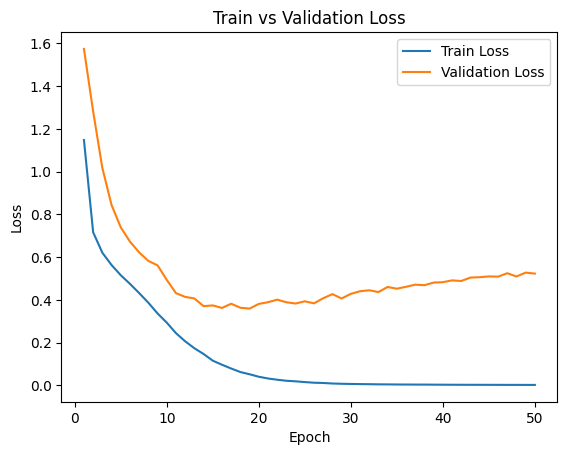

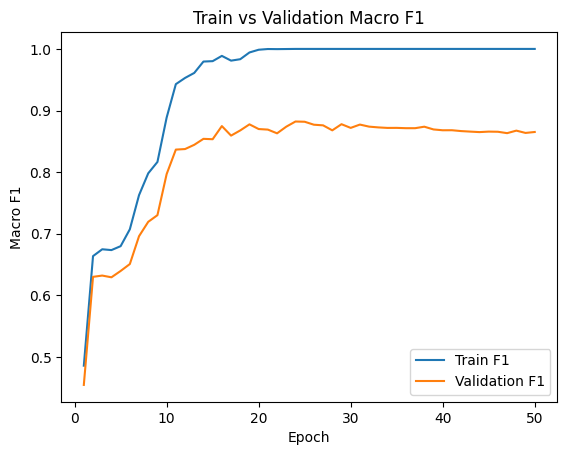

In [ ]:
import matplotlib.pyplot as plt

train_losses = []
val_losses = []
train_f1s = []
val_f1s = []

def flatten_windows(X):
    return X.reshape(X.shape[0], -1)

X_train_f = flatten_windows(X_train)
X_val_f   = flatten_windows(X_val)
X_test_f  = flatten_windows(X_test)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_t = torch.tensor(X_train_f, dtype=torch.float32)
Y_train_t = torch.tensor(y_train, dtype=torch.long)

X_val_t = torch.tensor(X_val_f, dtype=torch.float32)
Y_val_t = torch.tensor(y_val, dtype=torch.long)

X_test_t = torch.tensor(X_test_f, dtype=torch.float32)
Y_test_t = torch.tensor(y_test, dtype=torch.long)

batch_size = 640

train_loader = DataLoader(TensorDataset(X_train_t, Y_train_t), batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_t, Y_val_t), batch_size=batch_size)
test_loader  = DataLoader(TensorDataset(X_test_t, Y_test_t), batch_size=batch_size)
torch.manual_seed(42)

class MLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.model(x)

    def forward(self, x):
        return self.model(x)

input_dim = X_train_f.shape[1]
num_classes = len(np.unique(y_train))

model = MLP(input_dim, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    model.parameters(),
    lr=1e-3
)

def evaluate(loader):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(y.cpu().numpy())

    return np.array(all_targets), np.array(all_preds)

epochs = 50
best_val_f1 = 0

for epoch in range(epochs):
    model.train()
    running_train_loss = 0.0

    # Train
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * x.size(0)

    # Get losses
    epoch_train_loss = running_train_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            loss = criterion(outputs, y)
            running_val_loss += loss.item() * x.size(0)

    epoch_val_loss = running_val_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)

    # Get the vals
    y_train_true, y_train_pred = evaluate(train_loader)
    train_macro_f1 = f1_score(y_train_true, y_train_pred, average='macro')
    train_f1s.append(train_macro_f1)

    y_val_true, y_val_pred = evaluate(val_loader)
    val_macro_f1 = f1_score(y_val_true, y_val_pred, average='macro')
    val_f1s.append(val_macro_f1)

    # Save best model
    if val_macro_f1 > best_val_f1:
        best_val_f1 = val_macro_f1
        torch.save(model.state_dict(), "best_mlp.pt")

    print(
        f"Epoch {epoch+1}/{epochs} | "
        f"Train Loss: {epoch_train_loss:.4f} | "
        f"Val Loss: {epoch_val_loss:.4f} | "
        f"Train F1: {train_macro_f1:.4f} | "
        f"Val F1: {val_macro_f1:.4f}"
    )


    epochs_range = range(1, epochs + 1)

# Plot vals and losses
plt.figure()
plt.plot(epochs_range, train_losses)
plt.plot(epochs_range, val_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.show()

plt.figure()
plt.plot(epochs_range, train_f1s)
plt.plot(epochs_range, val_f1s)
plt.xlabel("Epoch")
plt.ylabel("Macro F1")
plt.title("Train vs Validation Macro F1")
plt.legend(["Train F1", "Validation F1"])
plt.show()